# Audiobooks business case

### Problem

You are given data from an Audiobook App. Logically, it relates to the audio versions of books ONLY. Each customer in the database has made a purchase at least once, that's why he/she is in the database. We want to create a machine learning algorithm based on our available data that can predict if a customer will buy again from the Audiobook company.

The main idea is that if a customer has a low probability of coming back, there is no reason to spend any money on advertising to him/her. If we can focus our efforts SOLELY on customers that are likely to convert again, we can make great savings. Moreover, this model can identify the most important metrics for a customer to come back again. Identifying new customers creates value and growth opportunities.

You have a .csv summarizing the data. There are several variables: Customer ID, ), Book length overall (sum of the minute length of all purchases), Book length avg (average length in minutes of all purchases), Price paid_overall (sum of all purchases) ,Price Paid avg (average of all purchases), Review (a Boolean variable whether the customer left a review), Review out of 10 (if the customer left a review, his/her review out of 10, Total minutes listened, Completion (from 0 to 1), Support requests (number of support requests; everything from forgotten password to assistance for using the App), and Last visited minus purchase date (in days).

These are the inputs (excluding customer ID, as it is completely arbitrary. It's more like a name, than a number).

The targets are a Boolean variable (0 or 1). We are taking a period of 2 years in our inputs, and the next 6 months as targets. So, in fact, we are predicting if: based on the last 2 years of activity and engagement, a customer will convert in the next 6 months. 6 months sounds like a reasonable time. If they don't convert after 6 months, chances are they've gone to a competitor or didn't like the Audiobook way of digesting information. 

The task is simple: create a machine learning algorithm, which is able to predict if a customer will buy again. 

This is a classification problem with two classes: won't buy and will buy, represented by 0s and 1s. 

Good luck!

## Preprocess the data. Balance the dataset. Create 3 datasets: training, validation, and test. Save the newly created sets in a tensor friendly format (e.g. *.npz)

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code, which is not that hard, but is crucial to creating a good model.

If you want to know how to do that, go through the code with comments. In any case, this should do the trick for most datasets organized in the way: many inputs, and then 1 cell containing the targets (supersized learning datasets). Keep in mind that a specific problem may require additional preprocessing.

Note that we have removed the header row, which contains the names of the categories. We simply want the data.

In [ ]:
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

###**Loading the Data**

In [ ]:
raw_data=np.loadtxt('/content/Audiobooks_data (1).csv',delimiter=',')
unscaled_inputs_all=raw_data[:,1:-1]
targets_all=raw_data[:,-1]

###**Balance the Dataset**

In [ ]:
num_one_targets=int(np.sum(targets_all))
zero_targets_counter=0
indices_to_remove= []

for i in range(targets_all.shape[0]):
  if targets_all[i] ==0:
    zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
      indices_to_remove.append(i)

unscaled_inputs_equal_priors=np.delete(unscaled_inputs_all,indices_to_remove,axis=0)
targets_equal_priors=np.delete(targets_all,indices_to_remove,axis=0)



In [ ]:
unscaled_inputs_equal_priors

array([[1620.  , 1620.  ,   19.73, ..., 1603.8 ,    5.  ,   92.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    0.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,  388.  ],
       ...,
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    6.  ],
       [1674.  , 3348.  ,    7.99, ...,    0.  ,    0.  ,    0.  ],
       [1674.  , 3348.  ,    5.33, ...,    0.  ,    0.  ,    0.  ]])

###**Stadardize the Inputs**

In [ ]:
scaled_inputs=preprocessing.scale(unscaled_inputs_equal_priors)

###**Shuffle the Data**

In [ ]:
shuffled_indices=np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs=scaled_inputs[shuffled_indices]
shuffled_targets=targets_equal_priors[shuffled_indices]

###**Split the dataset into train,validation and test**

In [ ]:
sample_count=shuffled_inputs.shape[0]

train_sample_count=int(0.8*sample_count)
validation_sample_count=int(0.1*sample_count)
test_sample_count=sample_count-train_sample_count-validation_sample_count


train_inputs=shuffled_inputs[:train_sample_count]
train_targets=shuffled_targets[:train_sample_count]


validation_inputs=shuffled_inputs[train_sample_count:train_sample_count+validation_sample_count]
validation_targets=shuffled_targets[train_sample_count:train_sample_count+validation_sample_count]


test_inputs=shuffled_inputs[train_sample_count+validation_sample_count:]
test_targets=shuffled_targets[train_sample_count+validation_sample_count:]

In [ ]:
print(np.sum(train_targets), train_sample_count, np.sum(train_targets) / train_sample_count)
print(np.sum(validation_targets), validation_sample_count, np.sum(validation_targets) / validation_sample_count)
print(np.sum(test_targets), test_sample_count, np.sum(test_targets) / test_sample_count)

1821.0 3579 0.5088013411567477
197.0 447 0.4407158836689038
219.0 448 0.4888392857142857


###**Save the three datasets in *.npz**

In [ ]:
np.savez('Audiobooks_train_data',inputs=train_inputs,targets=train_targets)
np.savez('Audiobooks_validation_data',inputs=validation_inputs,targets=validation_targets)
np.savez('Audiobooks_test_data',inputs=test_inputs,targets=test_targets)

###**Load th data**

In [ ]:
npz= np.load('/content/Audiobooks_test_data.npz')

train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

<ipython-input-27-ed56d94e9fd3>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_inputs = npz['inputs'].astype(np.float)
<ipython-input-27-ed56d94e9fd3>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_targets 

In [ ]:
npz= np.load('/content/Audiobooks_validation_data.npz')

validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

<ipython-input-28-a849e40acf63>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  validation_inputs = npz['inputs'].astype(np.float)
<ipython-input-28-a849e40acf63>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  validatio

In [ ]:
npz=np.load('/content/Audiobooks_test_data.npz')

test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

<ipython-input-29-4ee8920e3682>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_inputs = npz['inputs'].astype(np.float)
<ipython-input-29-4ee8920e3682>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_targets = 

###**Model**

outline,optimizers,loss,early stopping and training

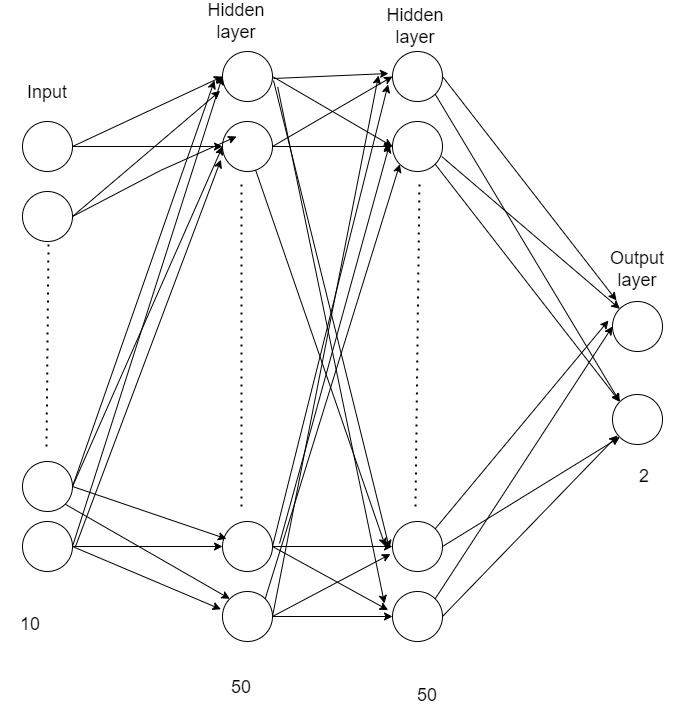

In [ ]:
input_size=10
output_size=2
hidden_layer_size=50


model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    tf.keras.layers.Dense(output_size,activation='softmax')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size = 100
max_epochs = 100

model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          validation_data=(validation_inputs,validation_targets),
          verbose=2
          )

Epoch 1/100
5/5 - 1s - loss: 0.6569 - accuracy: 0.6027 - val_loss: 0.6307 - val_accuracy: 0.6197 - 1s/epoch - 214ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6156 - accuracy: 0.6853 - val_loss: 0.6003 - val_accuracy: 0.6689 - 94ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.5833 - accuracy: 0.7165 - val_loss: 0.5766 - val_accuracy: 0.7025 - 77ms/epoch - 15ms/step
Epoch 4/100
5/5 - 0s - loss: 0.5567 - accuracy: 0.7299 - val_loss: 0.5568 - val_accuracy: 0.7069 - 83ms/epoch - 17ms/step
Epoch 5/100
5/5 - 0s - loss: 0.5346 - accuracy: 0.7433 - val_loss: 0.5394 - val_accuracy: 0.7181 - 101ms/epoch - 20ms/step
Epoch 6/100
5/5 - 0s - loss: 0.5160 - accuracy: 0.7500 - val_loss: 0.5244 - val_accuracy: 0.7293 - 70ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.4994 - accuracy: 0.7500 - val_loss: 0.5118 - val_accuracy: 0.7338 - 69ms/epoch - 14ms/step
Epoch 8/100
5/5 - 0s - loss: 0.4846 - accuracy: 0.7545 - val_loss: 0.4985 - val_accuracy: 0.7405 - 69ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - l

In [ ]:
input_size=10
output_size=2
hidden_layer_size=50


model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    tf.keras.layers.Dense(output_size,activation='softmax')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size = 100
max_epochs = 100
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs,validation_targets),
          verbose=2
          )

Epoch 1/100
5/5 - 1s - loss: 0.7049 - accuracy: 0.5357 - val_loss: 0.6684 - val_accuracy: 0.6197 - 1s/epoch - 249ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6465 - accuracy: 0.6920 - val_loss: 0.6236 - val_accuracy: 0.6980 - 44ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.6064 - accuracy: 0.7366 - val_loss: 0.5912 - val_accuracy: 0.7092 - 44ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.5752 - accuracy: 0.7433 - val_loss: 0.5664 - val_accuracy: 0.7315 - 69ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.5507 - accuracy: 0.7478 - val_loss: 0.5451 - val_accuracy: 0.7338 - 58ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.5308 - accuracy: 0.7500 - val_loss: 0.5272 - val_accuracy: 0.7405 - 57ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.5130 - accuracy: 0.7522 - val_loss: 0.5110 - val_accuracy: 0.7539 - 45ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.4980 - accuracy: 0.7612 - val_loss: 0.4964 - val_accuracy: 0.7472 - 60ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss:

patience=0 is default

###**Test**

In [ ]:
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)

14/14 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8304


In [ ]:
print('Test loss: {0:2f}. Test accuracy: {1:2f}%'.format(test_loss,test_accuracy*100.))


Test loss: 0.357708. Test accuracy: 83.035713%




---



---




---



---



